# “Women and children first” - An extraordinary act of altruism in a fateful night 

### Background
Titanic

April 15, 1912 

2 hours and 40 minutes sinking into the bottom of the sea

2,228 people off a sinking ship with only enough capacity in the lifeboats to fit 1,178 people

Captain Smith gave the order of “women and children first” 

### Did "women and children first" really happen?


Let's dive into the data

In [35]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
import matplotlib.patches as mpatches

Populating the interactive namespace from numpy and matplotlib


C:\Users\jeremy\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['nan', 'plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
#read data
titanic = pd.read_csv('titanic_data.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
#Data Wrangling
total_data = titanic.count()
percent_data=total_data/total_data['PassengerId']
percent_data

PassengerId    1.000000
Survived       1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.801347
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           1.000000
Cabin          0.228956
Embarked       0.997755
dtype: float64

Based on the table, we can see that about 73% of recorded passengers lack 'Cabin' data. Therefore, we are going to ignore this varible. Also, 'PassengerID','Name'and'Ticket'are irrelevant to our study, which will be excluded from our study.

The table above also shows that about 20% of age data are missing. Next, we will test if the passengers with age data have the same survival rate with those that do not have age data. It will help us to decide how we handle the missing age data.

In [38]:
titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [39]:
#define function to plot
def plot(df,group):
    ratio=titanic.groupby(group).mean()['Survived']
    ratio.plot.bar(color='pink',alpha=0.7)
    plt.title("Survival Rate by %s" % group)
    plt.xticks(rotation=0)
    plt.ylabel('Survival Rate')
    return ratio

With_Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

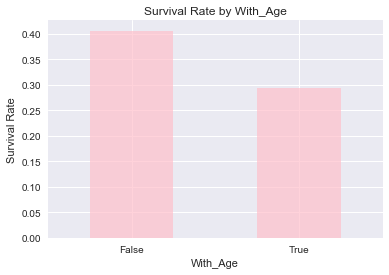

In [40]:
#Test if the passengers with age data have the same survival rate with those that do not have age data.
nan = np.isnan(titanic['Age'])
titanic['With_Age']= nan
plot(titanic,"With_Age")

It appears passengers without age information have a lower survivate rate. It may due to that it was harder to gather the age information of people who did not survive the trip. 

In this study, the Nan values are replaced with the mean age.

In [41]:
#Replace nan values use mean values
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
#Check the replaceing results
titanic[nan].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,With_Age
5,0,3,male,26.507589,0,0,8.4583,Q,True
17,1,2,male,30.740707,0,0,13.0000,S,True
19,1,3,female,21.750000,0,0,7.2250,C,True
26,0,3,male,26.507589,0,0,7.2250,C,True
28,1,3,female,21.750000,0,0,7.8792,Q,True


In [42]:
#Divide the data into two groups: survived and unsurvived
t_die=titanic[titanic['Survived']==0]
t_live=titanic[titanic['Survived']==1]

## First, we will explore the influence of sex, age, class on the survival rate individually

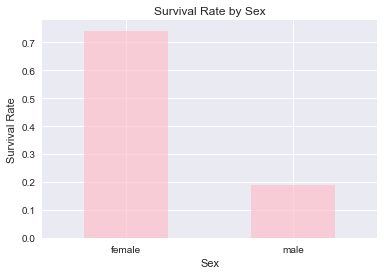

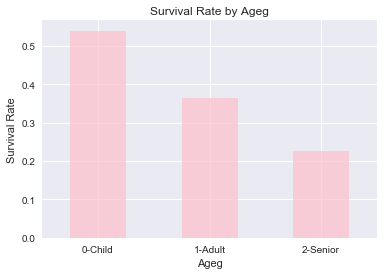

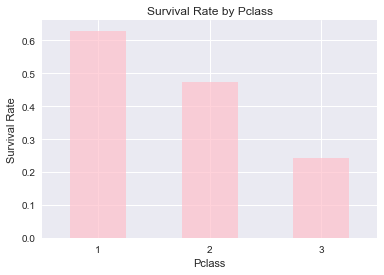

In [43]:
sexratio=plot(titanic,"Sex")
plt.show()
#Use apply function to category age
def age_to_group(age):
    if age < 18:
        return '0-Child'
    elif age > 60: 
        return '2-Senior'
    else:
        return '1-Adult'
    
titanic['Ageg'] = titanic['Age'].apply(age_to_group) 

ageratio=plot(titanic,"Ageg")
plt.show()

classratio=plot(titanic,"Pclass")
plt.show()


**We can see that the survial rate for female is way higher than the male. Also, children under the age of 18 have a higher chance to survive that fatal nigh. Besides age and sex, we find that passengers in the higher class have a better survival chance.**

## Next, we will look into the details with combination of different data

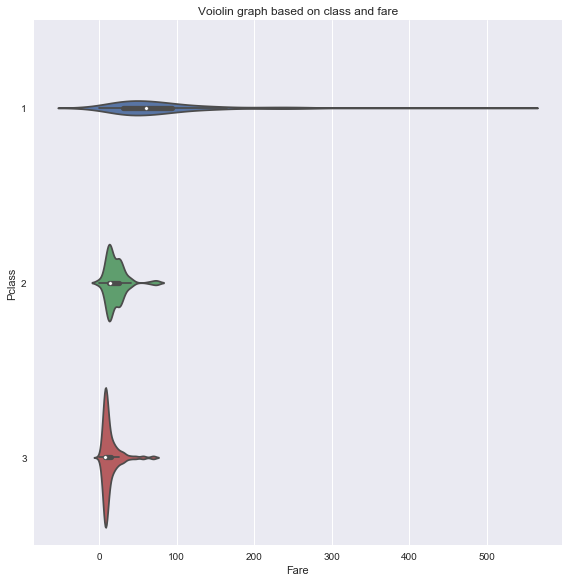

In [44]:
sf=sns.factorplot(x='Fare', y='Pclass', data = titanic,orient="h", kind="violin",size=8)
plt.title("Voiolin graph based on class and fare")

**At the first glance, people in higher class pays more for the fare. It appears that money helps these 'rich guys' to survive. Maybe the captain favored them? However, after investigting the bedroom locations for different classes, we find that higher class slept in the upper deck, which made it easier for them to escape to the life boats.**

Pclass                       1         2         3
Male to Female Ratio                              
1                     1.297872  1.421053  2.409722


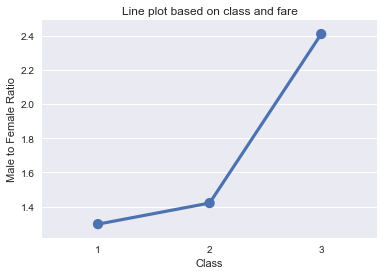

In [45]:
titanic['count']=1
count=titanic.groupby(['Sex','Pclass'])['count'].count()
df=count.unstack()
df=df.div(df.iloc[0]).reset_index().drop(['Sex'],axis=1).drop([0])
df.index.name = 'Male to Female Ratio'
print (df)
sns.pointplot(df.columns.tolist(),list(df.iloc[0]))
plt.ylabel("Male to Female Ratio")
plt.xlabel("Class")
plt.title("Line plot based on class and fare")

** As we can see, the male-female rato is 2.4 for class 3 compared to class 1. High propotion of female may contribute to the high survival rate of class 1.

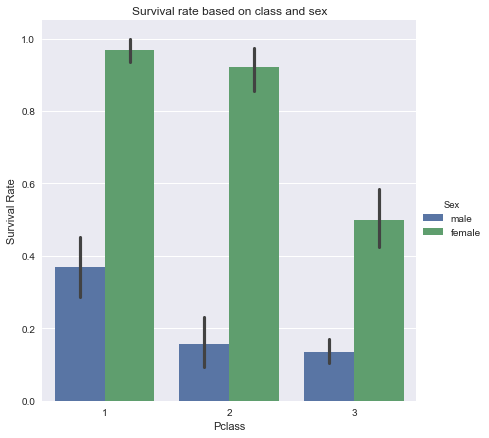

In [46]:
css=sns.factorplot(x='Pclass', y='Survived', hue='Sex',data = titanic,kind="bar",size=6)
plt.title("Survival rate based on class and sex")
plt.ylabel("Survival Rate")

** But still, the surval rate of female is lowest in class 3 : around 50% compared to nearly 100% of class 1 females.**

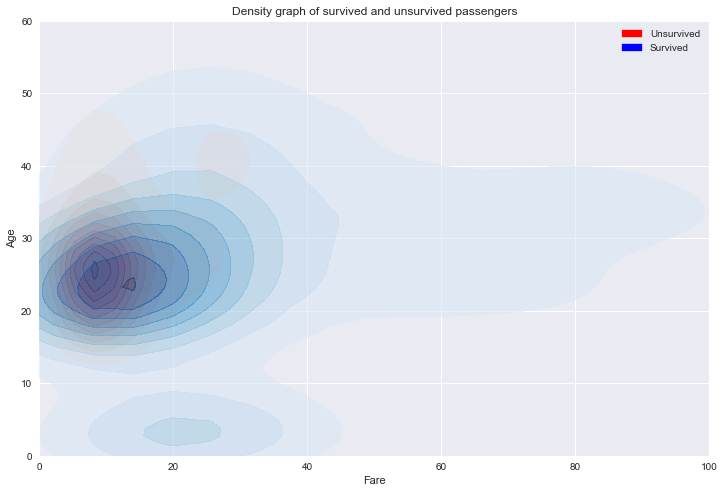

In [47]:
#plot(titanic,"Pclass")
#sns.factorplot(x="Fare", y="Survived", data=titanic, orient="h",kind="violin")
plt.figure(figsize=(12,8))
af=sns.kdeplot(t_die.Fare,t_die.Age,cmap="Reds", shade=True, alpha =0.6,shade_lowest=False)
af=sns.kdeplot(t_live.Fare,t_live.Age,cmap="Blues", shade=True, alpha =0.6,shade_lowest=False)
af.set(xlim=(0, 100))
af.set(ylim=(0, 60))
red_patch = mpatches.Patch(color='red', label='Unsurvived')
blue_patch = mpatches.Patch(color='blue', label='Survived')
plt.legend(handles=[red_patch,blue_patch])
plt.title("Density graph of survived and unsurvived passengers")

**When comparing the fare and age of passengers that survived and did not survive, we find that the distribution of survivals are different from the non-survivals. There are tails in lower ages and higher fare for the distribution of survivals. This is consistent with our previous findings.**

## Statistic test

### Chi-square (Χ^2) Test for Independence of Age

H0: The survial rate is independent of the age

H1: The survial rate is dependent of the age

alpha = 0.01


In [48]:
import scipy.stats as stats

atable=pd.crosstab(titanic['Ageg'],titanic['Survived'])
stats.chi2_contingency(atable)

(15.030221080773893,
 0.00054478979203749001,
 2,
 array([[  69.62626263,   43.37373737],
        [ 465.81818182,  290.18181818],
        [  13.55555556,    8.44444444]]))

p-value < alpha

H0 is rejected

**The age will affect the survival rate. Children have a higher survival rate than adults.**

### Chi-square (Χ^2) Test for Independence of Sex

H0: The survial rate is independent of the sex

H1: The survial rate is dependent of the sex

alpha = 0.01

In [49]:
stable=pd.crosstab(titanic['Sex'],titanic['Survived'])
stats.chi2_contingency(stable)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  120.52525253],
        [ 355.52525253,  221.47474747]]))

p-value < alpha

H0 is rejected

** The sex will affect the survival rate. Females have a higher survival rate than males.**

### Chi-square (Χ^2) Test for Independence of Passenger Class

H0: The survial rate is independent of the passenger class

H1: The survial rate is dependent of the passenger class

alpha = 0.01

In [50]:
stable=pd.crosstab(titanic['Pclass'],titanic['Survived'])
stats.chi2_contingency(stable)

(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,   82.90909091],
        [ 113.37373737,   70.62626263],
        [ 302.53535354,  188.46464646]]))

p-value < alpha

H0 is rejected

** The passenge class will affect the survival rate. Passenger in higher classes have a higher survival rate than those in lower classes.**

### Based on the analysis, the 'Momen and Children First' order by the captain did take effect. The survival rate is higher for females and kids under 18. A  maritime tragedy as it was, the extraordinary act of altruism really surprised you when you had thought you knew about human nature.

### We also find that people in higher class/paid more for the fare have a higher chance of survival. One of the reasons may  be that the bedrooms of higher class are closer to the upper deck.

## Limitations
1. Handling of missing data: the missing ages were replaced with the mean values. However, it would change the age distribution of the samlple
2. Some variables like number of sibling were not explored.
3. We explored the relationship between different variable and tried to explain the reason behind it. However, this is only an observational study. We cannot draw conclusion of causation from it.

## Future work
A machine learning model can be applied to explore the contributing factors to the survival quantitatively.

### References:

[Reference 1](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html)

[Reference 2](https://olegleyz.github.io/titanic_factors.html)

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

[Missing Data](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna)

[Class information](http://www.titanicandco.com/inside.html)

[plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
[plot](https://stackoverflow.com/questions/25212986/how-to-set-some-xlim-and-ylim-in-seaborn-lmplot-facetgrid)
[plot](https://matplotlib.org/users/legend_guide.html)
